Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<ipython-input-9-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

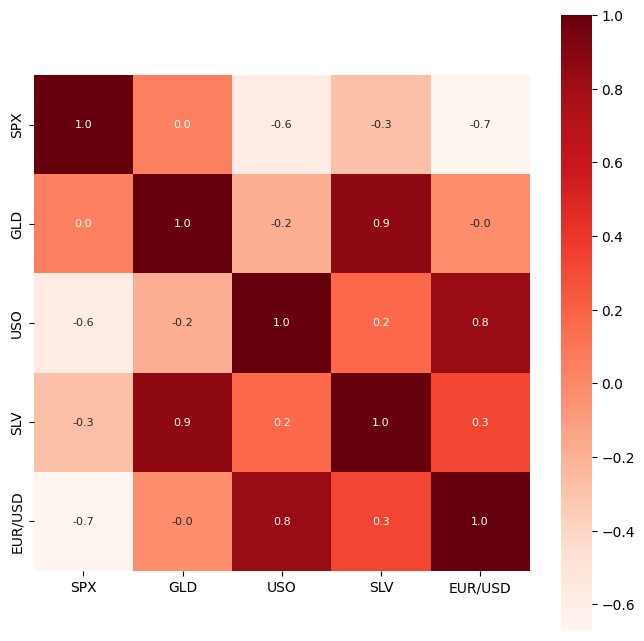

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-d3687c342f40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

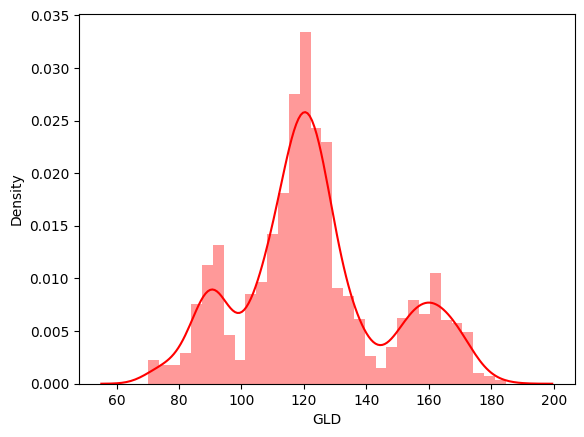

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='red')

Splitting the Features and Target

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.5764996   81.83929999 116.23670041 127.77790066 120.61740155
 154.72469711 150.07269864 126.03830024 117.46559872 125.86900085
 116.67660101 172.19350095 141.48449805 167.91109833 115.28710019
 117.83210055 138.40320268 170.25790076 159.37730297 157.53189928
 155.06990012 125.03360028 176.31349955 156.91660296 125.24250036
  93.78629955  78.11440021 120.41059996 119.04819953 167.39099932
  88.07290044 124.97610014  91.24550084 117.82719994 121.08359868
 136.09970069 115.53360079 114.95780055 148.37540011 107.20650078
 104.5643024   87.20169767 126.45690037 117.86680011 152.87269864
 119.77830006 108.47250029 107.99019825  93.1240999  127.04659784
  74.95840014 113.48129902 121.17519972 111.30539911 118.91579913
 120.68049945 159.19320019 168.1502011  146.96869686  85.81129855
  94.19010025  86.84999868  90.49310014 119.06620042 126.32270048
 127.59710021 169.70109996 122.23689933 117.46389888  98.25309989
 167.92860117 142.86249853 132.15160233 121.19340216 121.30199954
 119.62500

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890615223047913


In [24]:
#Ordinary Least Squares (OLS) is a method used for estimating the parameters in a linear regression model

import statsmodels.api as sm
model = sm.OLS(Y_train, X_train)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                    GLD   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          9.512e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):                        0.00
Time:                        17:17:42   Log-Likelihood:                         -6550.9
No. Observations:                1832   AIC:                                  1.311e+04
Df Residuals:                    1828   BIC:                                  1.313e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Compare the Actual Values and Predicted Values in a Plot

In [22]:
Y_test = list(Y_test)

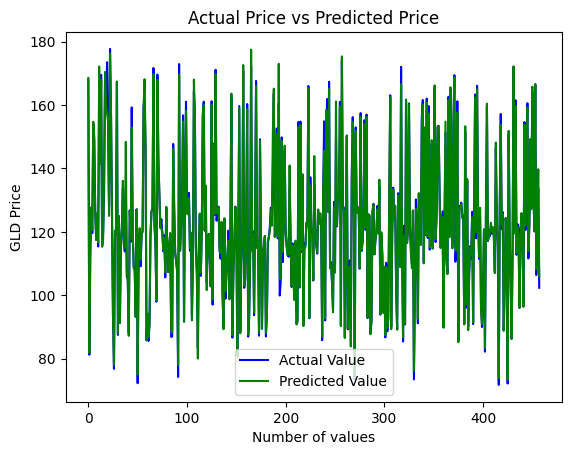

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [38]:
#linear , lasso, ridge , elastic net algoriths
#We use Regularization to prevent overfitting, and to improve models ability to generalize new data.
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
lm=LinearRegression()
lm.fit(X_train, Y_train)

ls=Lasso()
ls.fit(X_train,Y_train)

rd=Ridge()
rd.fit(X_train, Y_train)

el=ElasticNet()
el.fit(X_train, Y_train)


ElasticNet()

In [35]:
pred_lm=lm.predict(X_test)
pred_lm

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
#The accuracy for linear model

metrics.r2_score(Y_test, pred_lm)

0.8657886565869237

In [39]:
pred_ls=ls.predict(X_test)
pred_ls

array([158.84512104,  81.04703403, 113.21813043, 128.24921821,
       125.52591531, 140.30328872, 165.77178016, 125.05258374,
       114.14910705, 123.5210702 , 114.13628642, 175.00866734,
       132.57640461, 158.51043648, 117.92572817, 121.77591509,
       150.20780434, 160.68906278, 151.64461382, 161.99333696,
       145.4120571 , 118.34738175, 180.39772754, 178.24472286,
       124.27696964,  99.80255205,  76.60316115, 120.19171432,
       114.14002363, 158.50355697,  94.04763779, 120.96974119,
        87.74083986, 113.98321611, 112.01201714, 143.73115966,
       117.95660144, 115.64610606, 143.40791656, 113.24451605,
       101.05231751,  89.20936638, 121.32125716, 110.20612872,
       145.64975126, 120.04248218, 110.9111235 , 110.91371884,
        96.98342951, 124.04251147,  78.81883439, 114.75212601,
       121.30272027, 114.15079702, 121.28412116, 117.14793   ,
       152.17201044, 182.85683662, 196.50648401,  91.38003712,
       102.03203664,  87.21288355,  94.86738033, 119.75

In [40]:
#The accuracy for Lasso Model
metrics.r2_score(Y_test, pred_ls)


0.8644937172756186

In [41]:
pred_rd=rd.predict(X_test)
pred_rd

array([159.41217377,  81.41067223, 113.45286568, 128.52268766,
       126.12904639, 141.21796578, 165.55992391, 124.51272288,
       113.96680173, 123.05293267, 113.96677334, 174.9527407 ,
       132.66607896, 159.1925998 , 118.76731612, 122.10056199,
       150.37546988, 161.23515672, 152.22944059, 162.20774214,
       145.84749697, 118.10261523, 180.28634974, 178.19004225,
       123.60162289,  98.92583263,  76.58771158, 119.47257119,
       113.87532208, 159.2008069 ,  93.77734507, 120.15451735,
        88.46640802, 114.25007182, 112.68721266, 144.16004972,
       118.68486133, 115.84361573, 144.00662618, 113.74676754,
       100.54633368,  89.36132752, 120.47253309, 110.43899141,
       146.41256091, 119.38384265, 110.97778757, 111.28302346,
        96.50542942, 123.47757799,  79.4041022 , 115.28512858,
       121.73406408, 114.5023779 , 120.94883509, 117.10592786,
       152.3189275 , 182.83147689, 196.76586832,  91.06448552,
       101.9072978 ,  87.40900375,  94.37800647, 119.23

In [42]:
#Accuracy using L2 Regularization
#Ridge
metrics.r2_score(Y_test, pred_rd)

0.8656555635048913

In [43]:
pred_el = el.predict(X_test)
pred_el

array([158.57910154,  81.15716379, 113.3538393 , 128.25191066,
       125.53952633, 140.18936977, 165.45785767, 125.06490039,
       114.18995068, 123.47616479, 114.18878039, 174.6623751 ,
       132.50480804, 158.25170032, 117.98724293, 121.81648914,
       150.01387821, 160.41237887, 151.42679374, 161.71195401,
       145.24461748, 118.36126734, 180.01049292, 177.84218125,
       124.27130955,  99.99066591,  76.81396514, 120.19249397,
       114.19501895, 158.25997191,  94.31024198, 120.99850413,
        87.73101305, 114.10966411, 112.11392279, 143.58268953,
       118.0137712 , 115.73657049, 143.26050313, 113.34691003,
       101.2270957 ,  89.22236073, 121.34330147, 110.3169459 ,
       145.48341837, 120.04920031, 111.05106792, 111.04088538,
        96.97892508, 123.99268802,  79.1461653 , 114.82504312,
       121.35740326, 114.24758115, 121.32585747, 117.1796214 ,
       151.95529281, 182.43071629, 195.94713221,  91.41170903,
       102.03159469,  87.22818933,  95.12889807, 119.79

In [44]:
##Accuracy using ElasticNet
metrics.r2_score(Y_test, pred_el)


0.8648814476946795

By comparing Linear and Random Forest we are getting better accuracy at Random forest of 98%.